# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning the Data 

# Importing the data

In [6]:
path_1=r"C:\Users\Lenovo\Downloads\Case_Study-20240706T070026Z-001\Case_Study\Datasets\Play_Store_Data.csv"
path_2=r"C:\Users\Lenovo\Downloads\Case_Study-20240706T070026Z-001\Case_Study\Datasets\User_Reviews.csv"

In [7]:
df=pd.read_csv(path_1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df_rev=pd.read_csv(path_2)
df_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# App Data

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Size

In [9]:
df.shape

(10841, 13)

In [12]:
# - 10841 rows and 13 columns

# Column names

In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Numeric vs Nonnumeric Data

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
# Reviews- Convert to Numeric
# Size- Convert to Numeric
# Installs- Convert to Numeric
# Price- Convert to Numeric
# Category or Geners either we can drop since both contains the same information

# Null values / Missing values

In [12]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
# - Rating column has some good amount of null values.
# - Apart from ratings there are some columns that have a few null values

# Treating the null values

In [14]:
# - We have two options- 
# - 1- Drop the null values
# - 2- Impute the null values

In [15]:
# df.dropna()

# Impute the null values

In [16]:
# - We always impute the null values columnwise

# Rating

In [17]:
# - How many null values? - If any column has more thn 25% null values then we drop that column
# - Nature of the column (Numeric continuous / Categorical)

In [18]:
df.Rating.isna().sum()*100/len(df)

13.596531685268886

In [19]:
df.Rating.dtype

dtype('float64')

In [20]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [21]:
# - It's a cataegorical column
# - We can fill the ull values with the mode value

In [26]:
df.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [22]:
df.Rating.mode()

0    4.4
Name: Rating, dtype: float64

In [23]:
# We are filling the null values with the mode value in Rating column

In [24]:
df.Rating.fillna(df.Rating.mode()[0],inplace=True)

In [25]:
df.Rating.mode()[0]

4.4

In [26]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [27]:
def fill_value(col):
    return df[col].fillna(df[col].mode()[0],inplace=True)

In [29]:
for i in df.columns:
    fill_value(i)

In [30]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [31]:
# - We have succesfully filled all the missing values

In [32]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Reviews

In [40]:
df[df.Reviews=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [41]:
# - This particular row is showing weird behaviour so we can drop this row

In [33]:
df.drop(10472,axis=0,inplace=True)

In [34]:
df.shape

(10840, 13)

In [36]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [37]:
[i for i in range(len(df))][-1]

10839

In [38]:
df.index=[i for i in range(len(df))]

In [39]:
df.shape

(10840, 13)

In [40]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [51]:
df.Reviews=df.Reviews.astype(int)

In [41]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Size

In [53]:
# df.Size.astype(int)

In [42]:
'19M'.strip('M')

'19'

In [43]:
df[df.Size.str.contains(r'[Mk]')]['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10834    9.6M
10835     53M
10836    3.6M
10837    9.5M
10839     19M
Name: Size, Length: 9145, dtype: object

In [44]:
df.loc[df.Size.str.contains(r'[M]'),'Size'].str.strip('M')

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10834    9.6
10835     53
10836    3.6
10837    9.5
10839     19
Name: Size, Length: 8829, dtype: object

In [45]:
df.loc[df.Size.str.contains(r'[M]'),'Size']=df.loc[df.Size.str.contains(r'[Mk]'),'Size'].str.strip('M')

In [46]:
df.Size.dtype

dtype('O')

In [49]:
df.Size.value_counts()

Size
Varies with device    1695
11                     198
12                     196
14                     194
13                     191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [50]:
np.round((df.loc[df.Size.str.contains('k'),'Size'].str.strip('k').astype(float))/1000,2)

58       0.20
209      0.02
384      0.08
450      0.12
458      0.70
         ... 
10762    0.55
10763    0.88
10797    1.02
10831    0.58
10832    0.62
Name: Size, Length: 316, dtype: float64

In [51]:
df.loc[df.Size.str.contains('k'),'Size']=np.round((df.loc[df.Size.str.contains('k'),'Size'].str.strip('k').astype(float))/1000,2)

In [52]:
df.Size

0                        19
1                        14
2                       8.7
3                        25
4                       2.8
                ...        
10835                    53
10836                   3.6
10837                   9.5
10838    Varies with device
10839                    19
Name: Size, Length: 10840, dtype: object

In [53]:
df.Size=pd.to_numeric(df.Size,errors='coerce')

In [54]:
df.Size.isna().sum()

1695

In [55]:
# M- Removed M
# K- We removed K and converted to MB
# varies with devices- Nan

In [57]:
df.Size.fillna(df.Size.mean(),inplace=True)

In [58]:
df.Size.isna().sum()

0

In [59]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Installs

In [60]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10835         5,000+
10836           100+
10837         1,000+
10838         1,000+
10839    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [61]:
import re

In [62]:
text='10,000+'

for i in re.finditer(r'[,+]',text):
    print(i)

<re.Match object; span=(2, 3), match=','>
<re.Match object; span=(6, 7), match='+'>


In [63]:
re.sub(r'[+,]','',text)

'10000'

In [64]:
df.Installs=df.Installs.replace(r'[+,]','',regex=True).astype(int)

In [65]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Price

In [66]:
df.Price

0        0
1        0
2        0
3        0
4        0
        ..
10835    0
10836    0
10837    0
10838    0
10839    0
Name: Price, Length: 10840, dtype: object

In [67]:
df.Price.value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [68]:
df.Price=df.Price.replace(r'[$]','',regex=True).astype(float)

In [69]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Content Rating

In [70]:
df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10835      Everyone
10836      Everyone
10837      Everyone
10838    Mature 17+
10839      Everyone
Name: Content Rating, Length: 10840, dtype: object

In [71]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [72]:
# 18+ and unrated we can add Everyone 10+

# Clubbing 18+ abd Unrated to 10+

In [73]:
df.columns=df.columns.str.replace(' ','_')

In [74]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [75]:
df.loc[df.Content_Rating=='Adults only 18+','Content_Rating']='Everyone 10+'

In [76]:
df.Content_Rating.value_counts()

Content_Rating
Everyone        8714
Teen            1208
Mature 17+       499
Everyone 10+     417
Unrated            2
Name: count, dtype: int64

In [77]:
df.loc[df.Content_Rating=='Unrated','Content_Rating']='Everyone 10+'

In [78]:
df.Content_Rating.value_counts()

Content_Rating
Everyone        8714
Teen            1208
Mature 17+       499
Everyone 10+     419
Name: count, dtype: int64

In [79]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [80]:
# df.Current_Ver.value_counts()

In [84]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

# Duplicates

In [85]:
df.duplicated().sum()

483

In [86]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,21.516527,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,21.516527,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,21.516527,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.000000,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,21.516527,1000000,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,21.516527,10000000,Free,0.0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,21.516527,1000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,21.516527,100000000,Free,0.0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.000000,10000,Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


# Drop Duplicates

In [87]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [88]:
df.shape

(10357, 13)

In [89]:
df.duplicated().sum()

0

# Univariate Analysis

In [93]:
# Reviews, Size and Installs

In [94]:
sns.set_theme(style='whitegrid',palette='bright',font='cursive',font_scale=1.8)

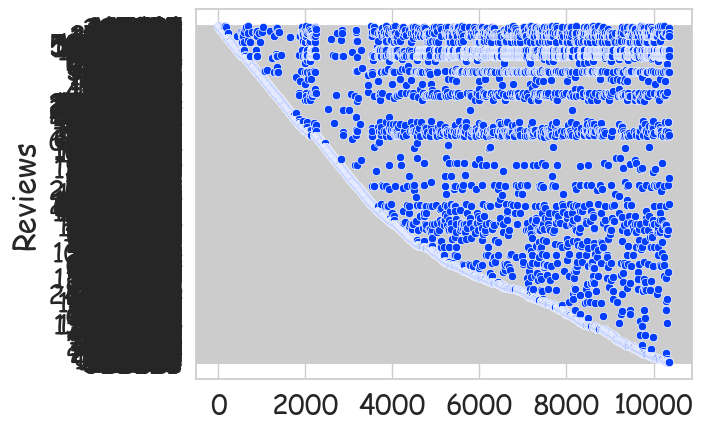

In [95]:
sns.scatterplot(y=df.Reviews,x=df.Reviews.index)
plt.show()

In [96]:
df.Reviews.value_counts()

Reviews
0          593
1          272
2          213
3          170
4          137
          ... 
240475       1
5282558      1
654418       1
251951       1
398307       1
Name: count, Length: 6001, dtype: int64

In [97]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

<Axes: ylabel='Reviews'>

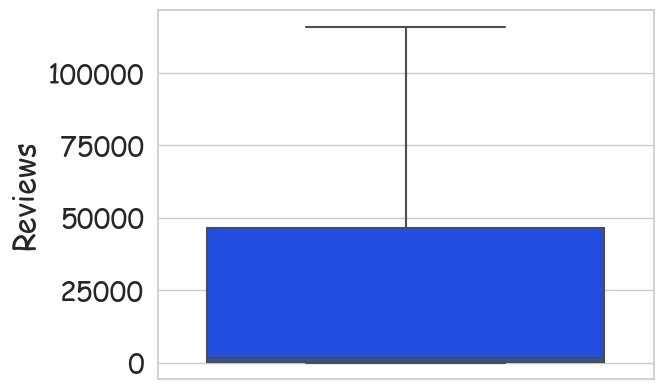

In [156]:
sns.boxplot(y='Reviews',data=df)

In [ ]:
df.sort_values(by='Reviews',ascending=True)['Reviews'].iloc[0:30]

In [ ]:
# df[df.Reviews>0]

In [ ]:
sns.scatterplot(y=df.Reviews,x=df.Reviews)
plt.show()

In [ ]:
# We can cap the values between 0 and 400000

# Size

In [ ]:
df.Size.describe()

In [ ]:
sns.scatterplot(y=df.Size,x=df.Size.index)
plt.show()

In [ ]:
sns.boxplot(y='Size',data=df)
plt.show()

# Installs

In [ ]:
df.Installs.describe()

In [ ]:

sns.scatterplot(y=df.Installs,x=df.Installs.index)
plt.show()

In [ ]:
df.Installs

In [ ]:
sns.kdeplot(df.Installs)
plt.show()

In [114]:
df['Reviews']=df['Reviews'].astype(int)

In [115]:
cols=['Reviews','Size','Installs']

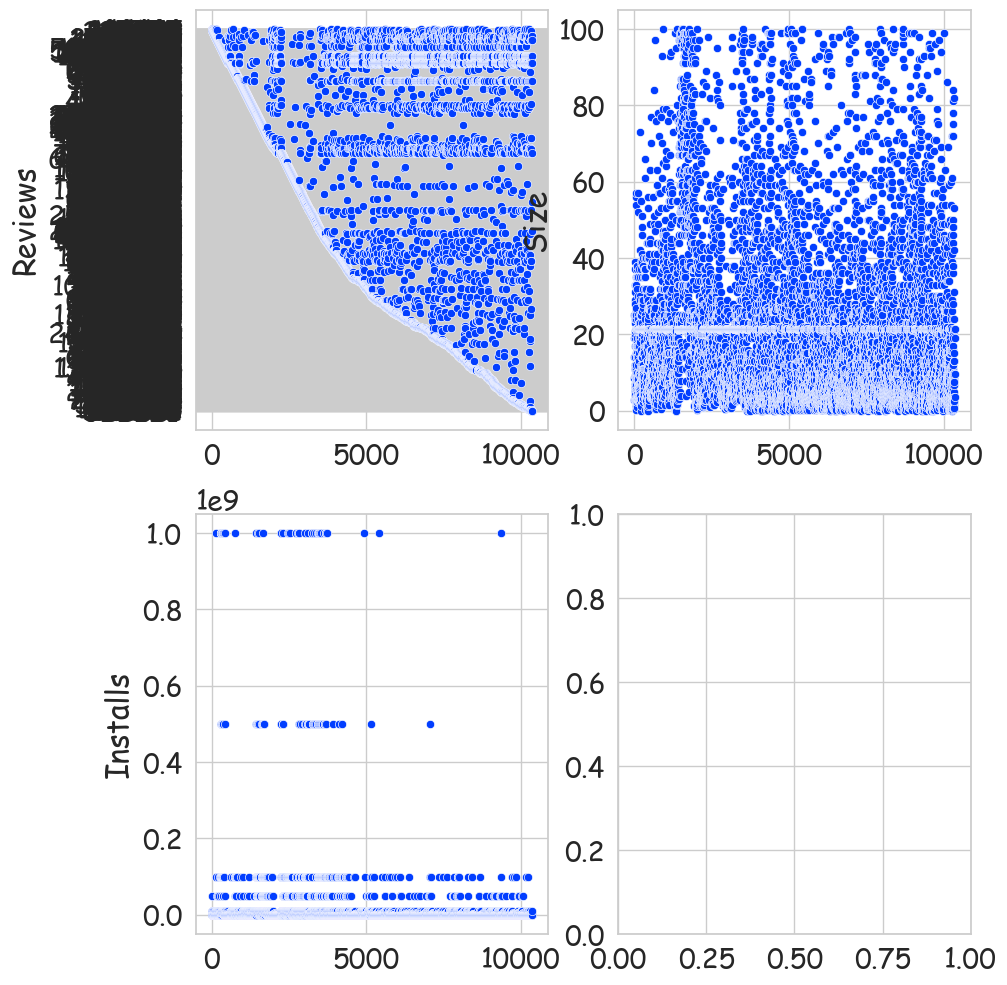

In [104]:
f,ax=plt.subplots(2,2,figsize=(10,12),dpi=100)
try:
    col_index=0

    for i in range(2):
        for j in range(2):
            sns.scatterplot(y=df[cols[col_index]],x=df[cols[col_index]].index,ax=ax[i,j])
            col_index+=1
except:
    pass

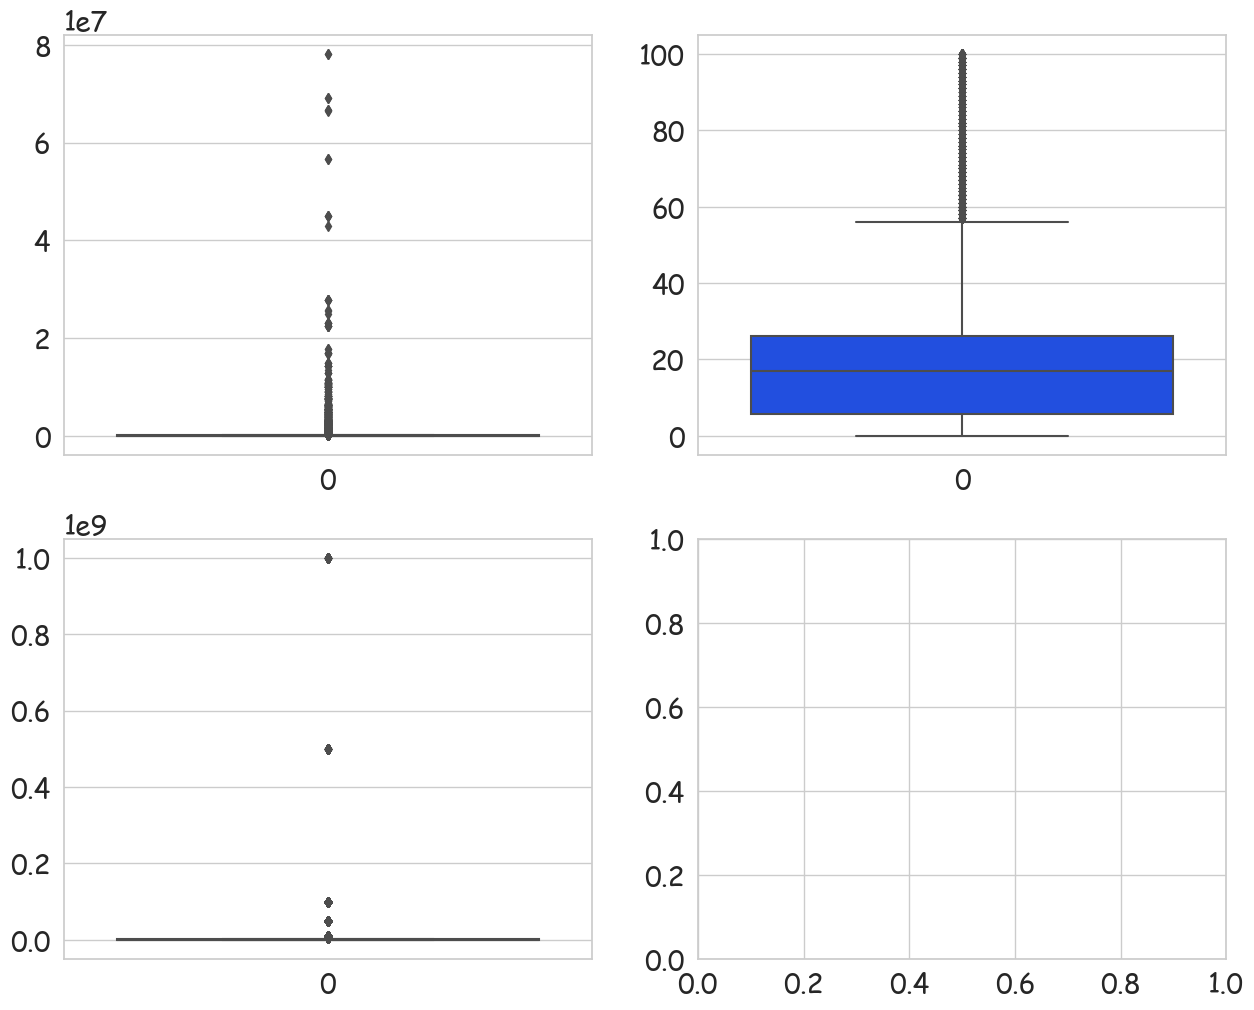

In [105]:
f,ax=plt.subplots(2,2,figsize=(15,12),dpi=100)
try:
    col_index=0

    for i in range(2):
        for j in range(2):
            sns.boxplot(df[cols[col_index]],ax=ax[i,j])
            col_index+=1
except:
    pass

# Let's cap the values using the IQR method

In [116]:
q3=df.Reviews.quantile(0.75)
q3

46416.0

In [117]:
q1=df.Reviews.quantile(0.25)
q1

32.0

In [120]:
iqr=q3-q1
iqr

46384.0

In [121]:
upper=q3+1.5*iqr
upper

115992.0

In [122]:
lower=q1-1.5*iqr
lower

-69544.0

In [123]:
df.Reviews.clip(lower,upper)

0           159
1           967
2         87510
3        115992
4           967
          ...  
10352        38
10353         4
10354         3
10355       114
10356    115992
Name: Reviews, Length: 10357, dtype: int32

In [124]:
def outlier_capping(col):
    q3=df[col].quantile(0.75)
    q1=df[col].quantile(0.25)
    
    iqr=q3-q1
    
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    
    df[col].clip(lower,upper,inplace=True)

In [126]:
for i in cols:
    outlier_capping(i)   # All positive and negative outliers are handdled

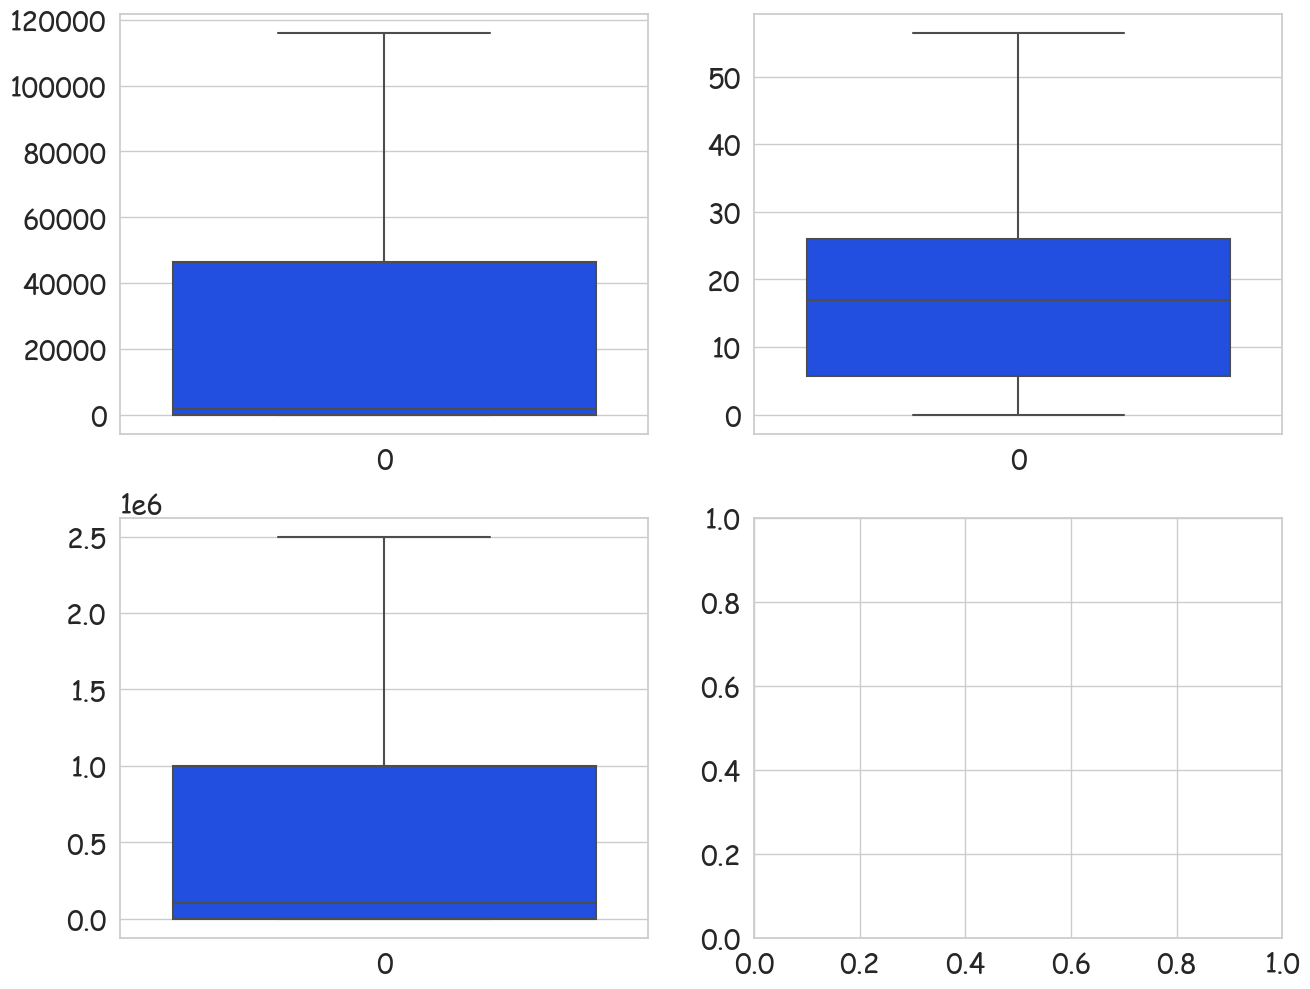

In [215]:
f,ax=plt.subplots(2,2,figsize=(15,12),dpi=100)
try:
    col_index=0

    for i in range(2):
        for j in range(2):
            sns.boxplot(df[cols[col_index]],ax=ax[i,j])
            col_index+=1
except:
    pass

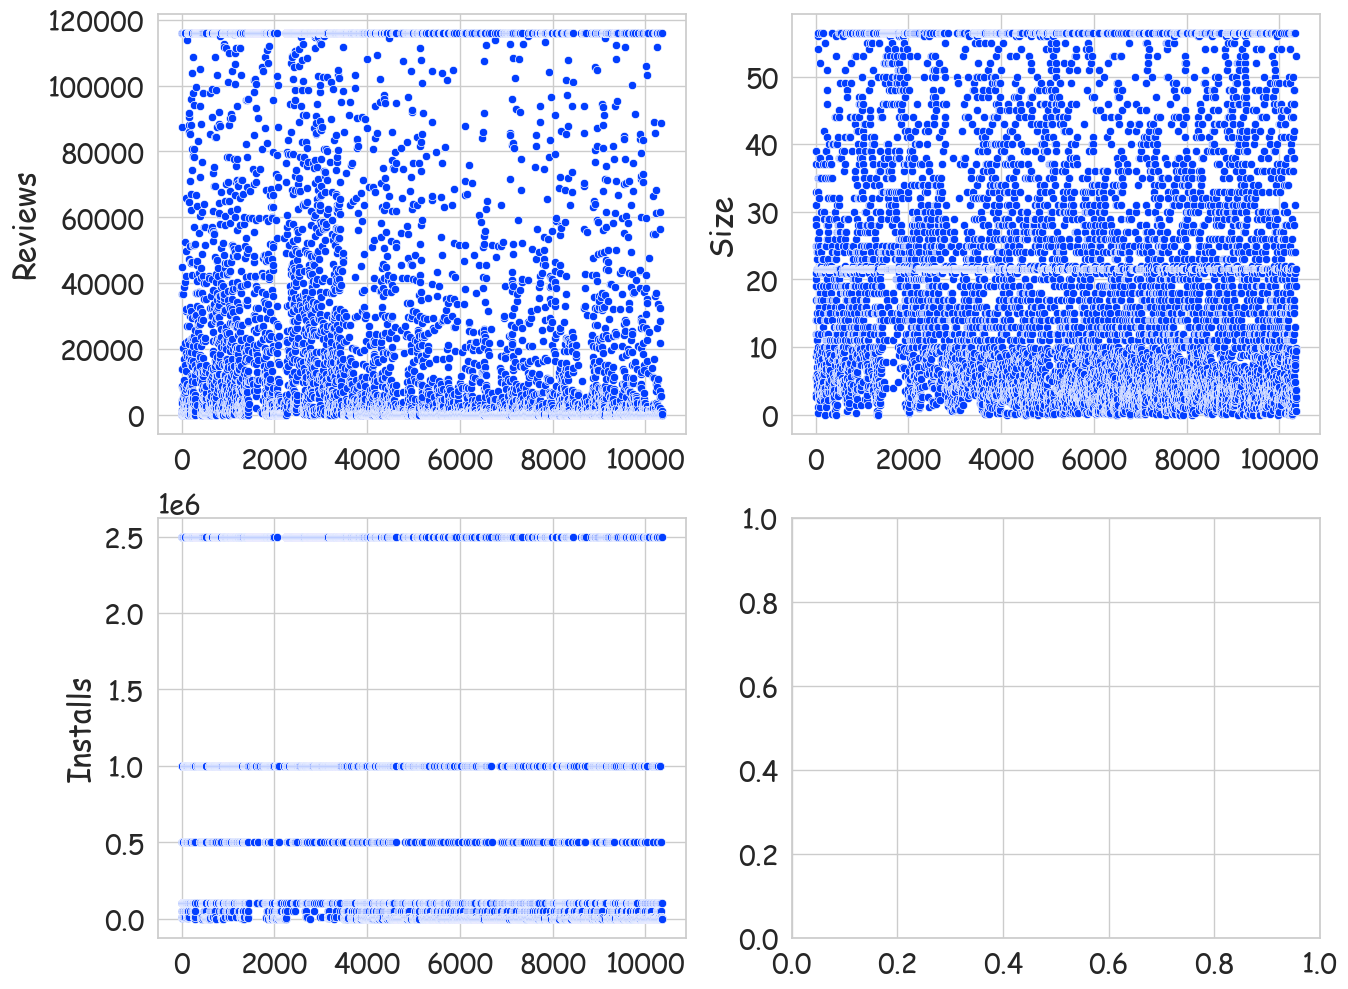

In [216]:
f,ax=plt.subplots(2,2,figsize=(15,12),dpi=100)
try:
    col_index=0

    for i in range(2):
        for j in range(2):
            sns.scatterplot(y=df[cols[col_index]],x=df[cols[col_index]].index,ax=ax[i,j])
            col_index+=1
except:
    pass

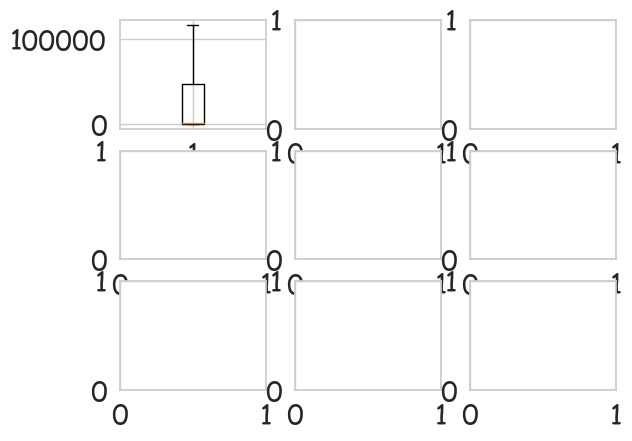

In [239]:
f,ax=plt.subplots(2,2)

ax[0,0].boxplot(df.Reviews)
a[0,1].sc

plt.show()

In [222]:
a,b=('figure',np.array([[1,2],[3,4]]))

In [223]:
a

'figure'

In [240]:
b

array([[1, 2],
       [3, 4]])

In [242]:
for i in range(2):
    for j in range(2):
        print(i,j)

0 0
0 1
1 0
1 1


In [243]:
for i in range(2):
    for j in range(2):
        print(b[i,j])

1
2
3
4


# Analysis

In [245]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,2498500,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,115992,25.0,2498500,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Type

In [246]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [247]:
# Count of Paid vs Free

In [248]:
df.Type.value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

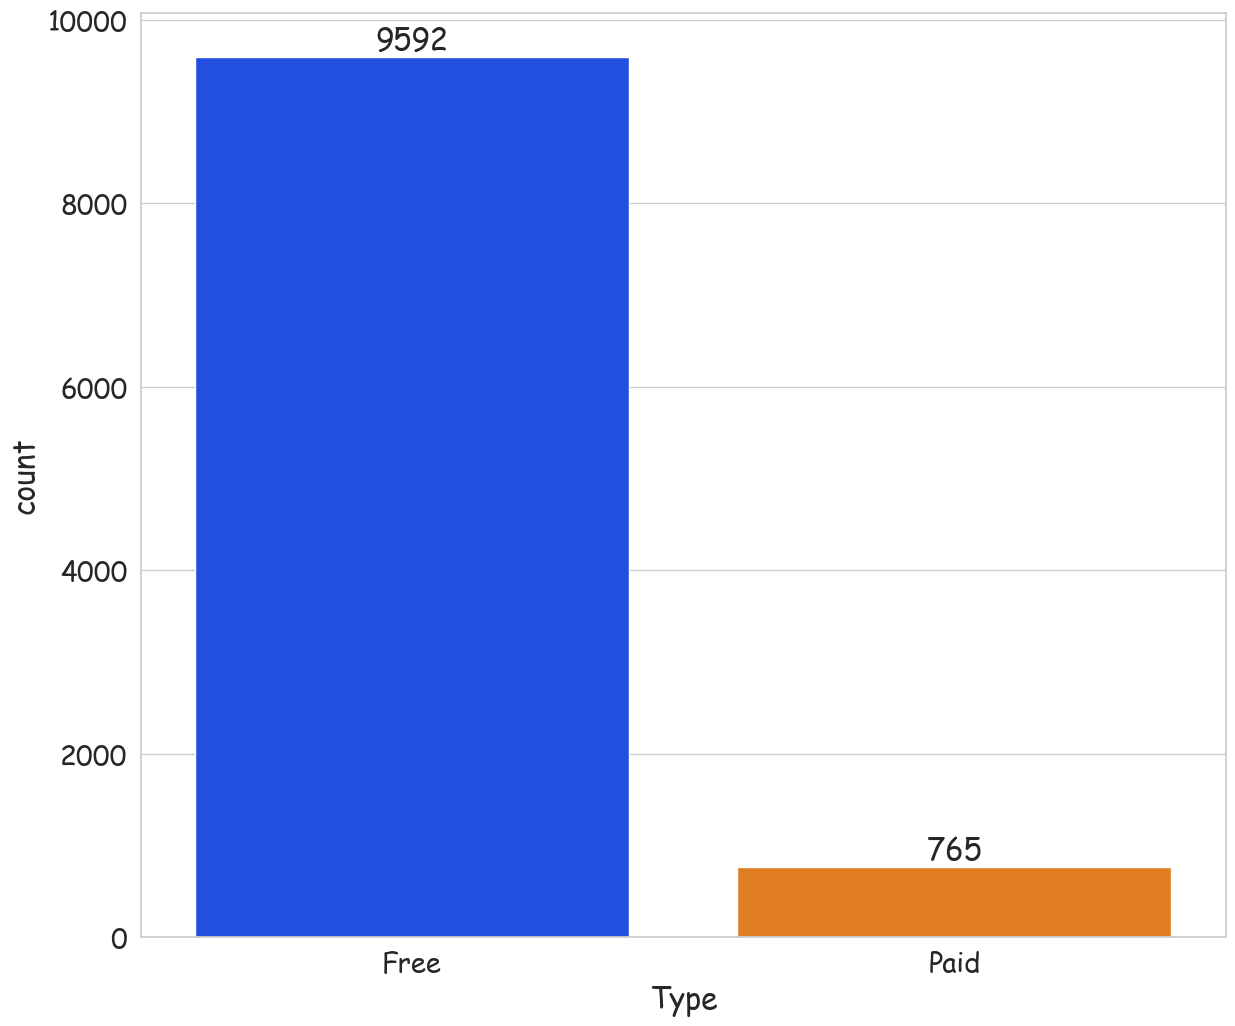

In [255]:
plt.figure(figsize=(14,12),dpi=100)
a=sns.countplot(x='Type',data=df)

for i in a.containers:
    a.bar_label(i)
plt.show()

# Rating

In [257]:
df.Rating.value_counts()

4.4    2497
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

# Number of apps on the basis of ratings

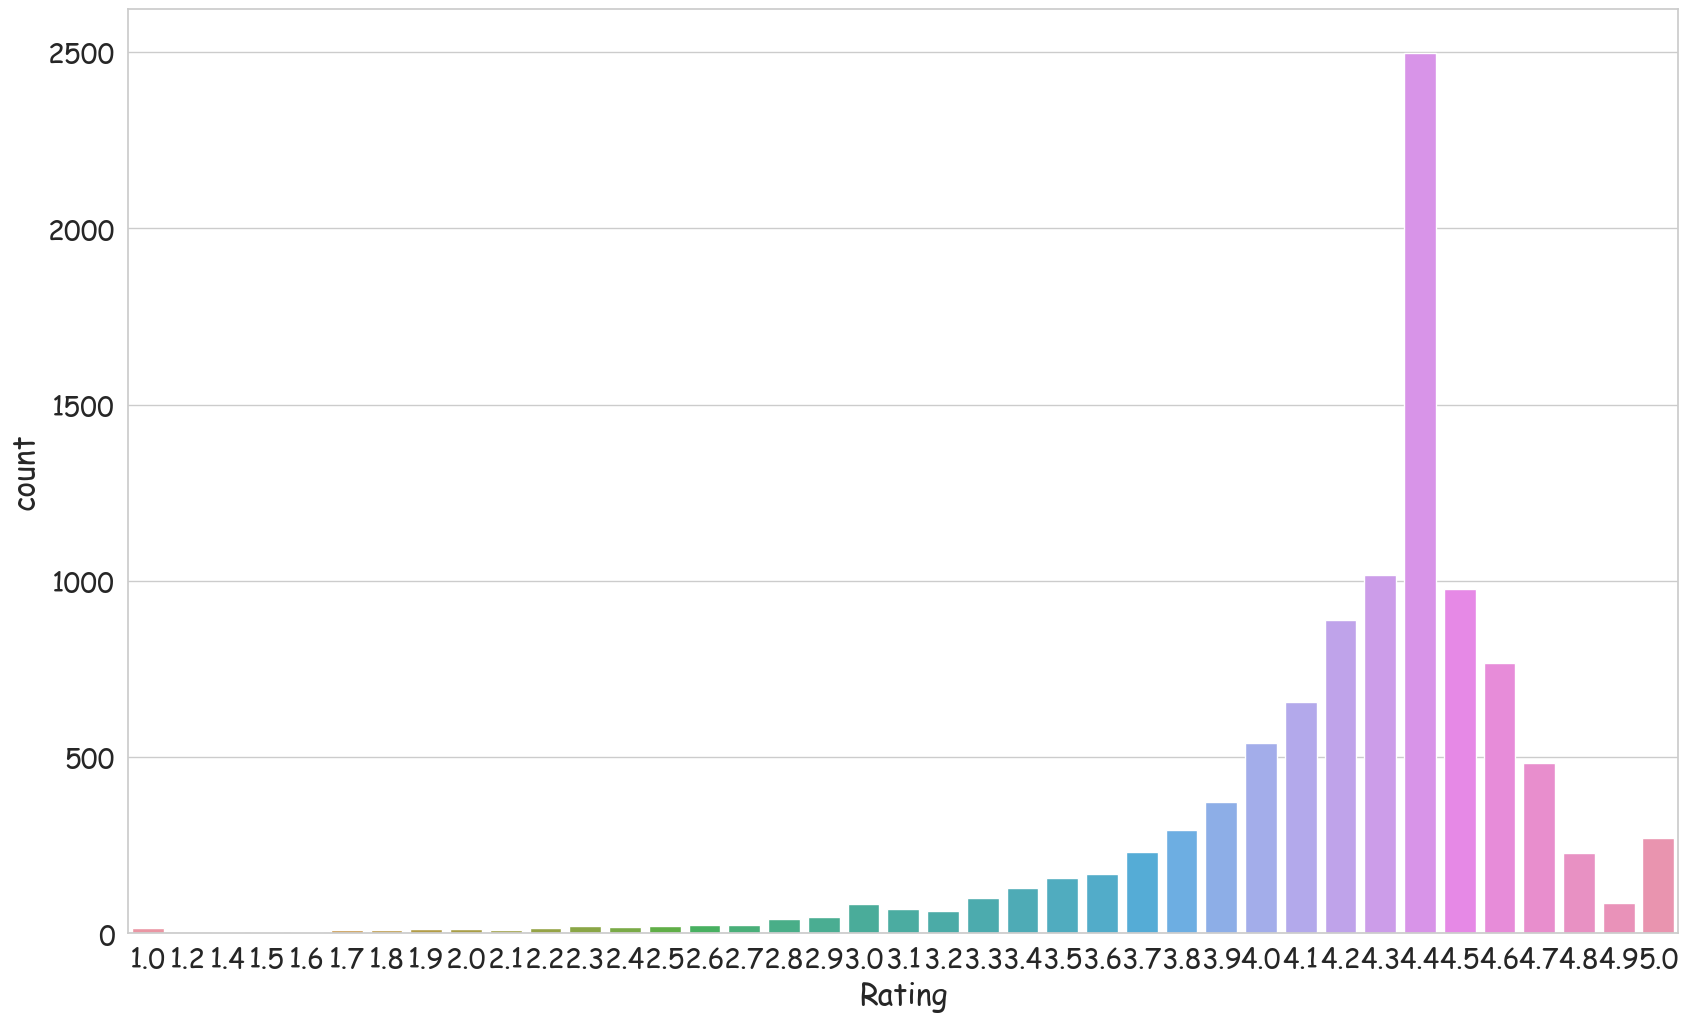

In [260]:
plt.figure(figsize=(20,12),dpi=100)

sns.countplot(x='Rating',data=df)

plt.show()

In [261]:
# From highest to lowest

In [267]:
rating=df.Rating.value_counts().sort_index(ascending=False)
rating.head()

5.0    271
4.9     87
4.8    228
4.7    484
4.6    768
Name: Rating, dtype: int64

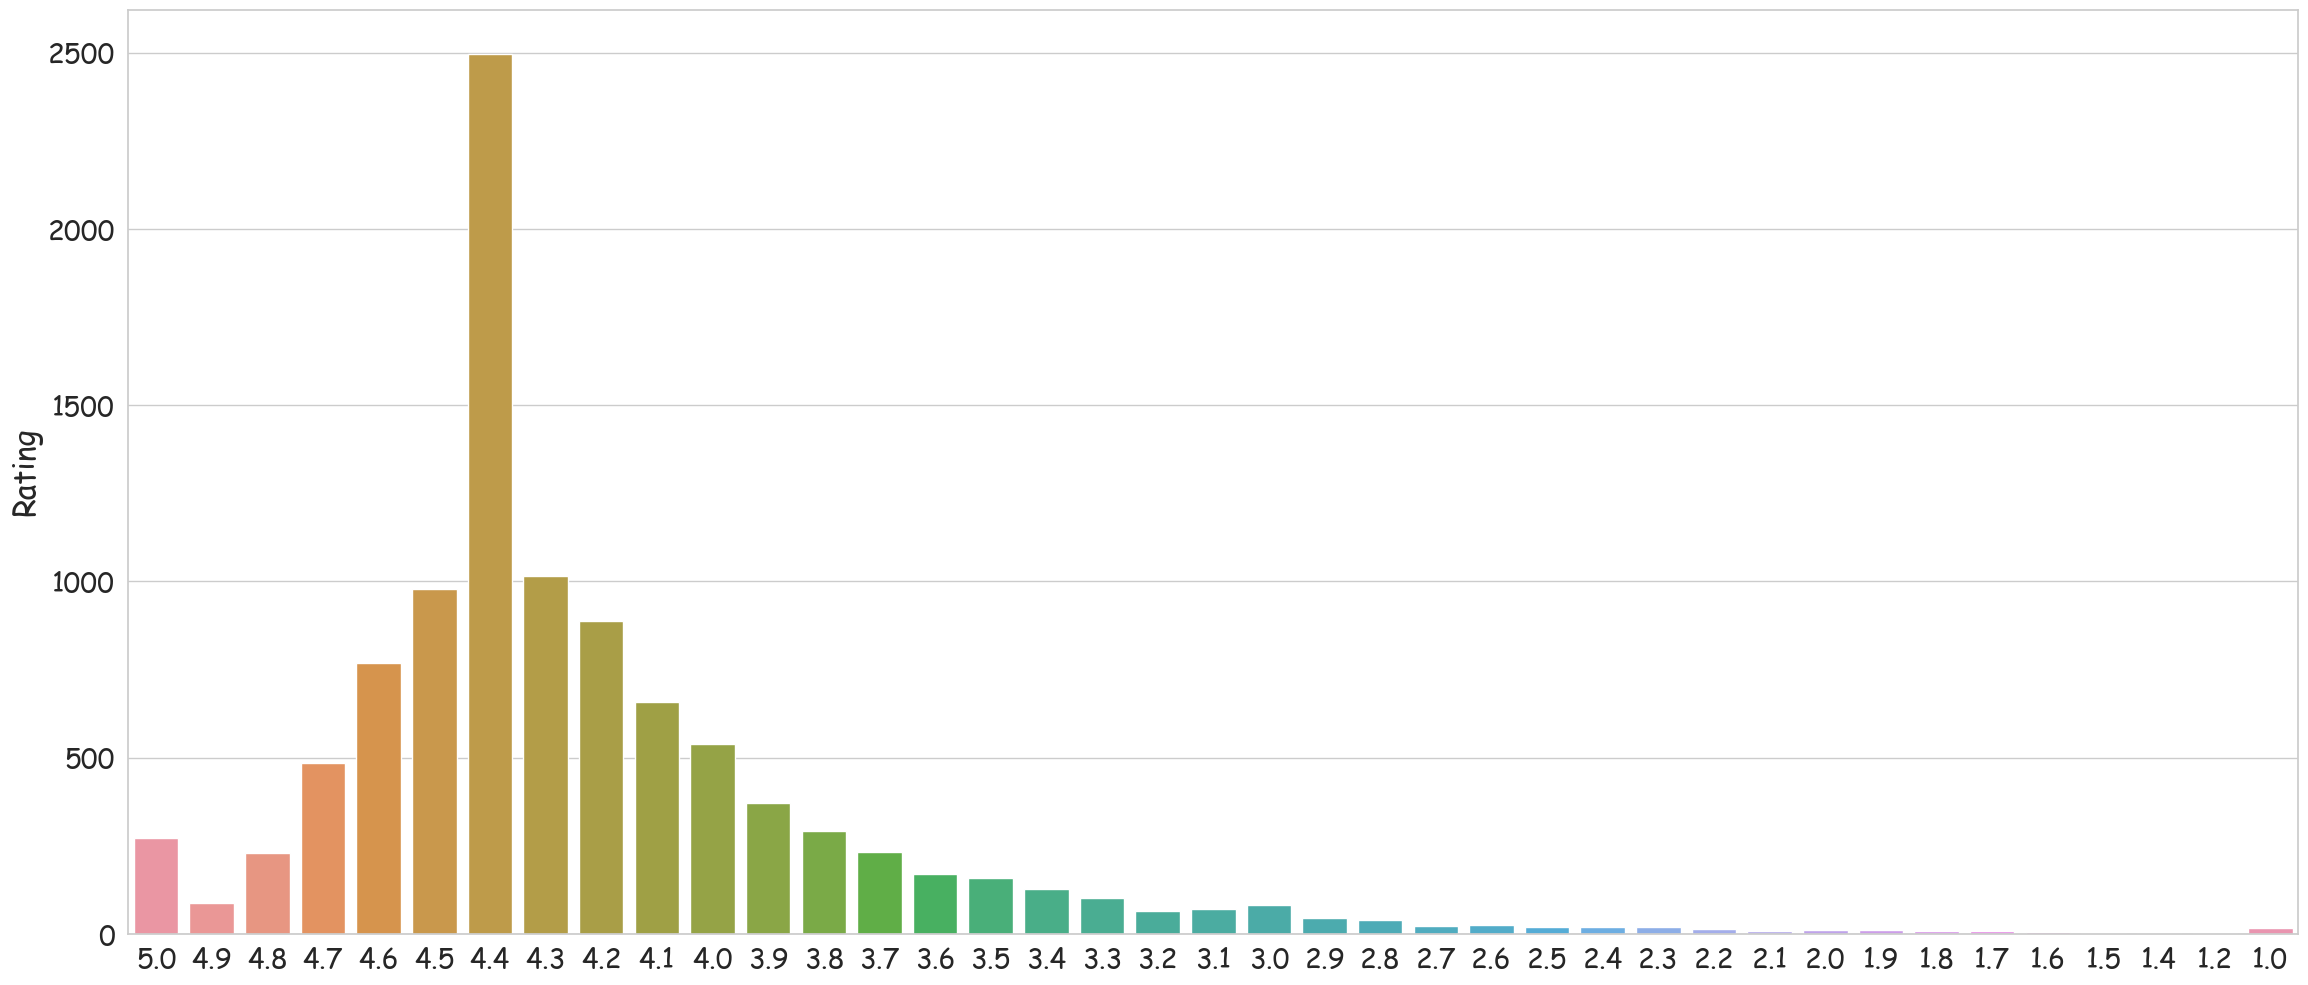

In [276]:
plt.figure(figsize=(28,12),dpi=100)
sns.barplot(y=rating,x=rating.index,order=rating.index)

plt.show()

In [128]:
rating=df.Rating.value_counts().sort_values(ascending=False) ## We are checking less than 100
rating=rating[rating>100]
rating.head(2)

Rating
4.4    2497
4.3    1016
Name: count, dtype: int64

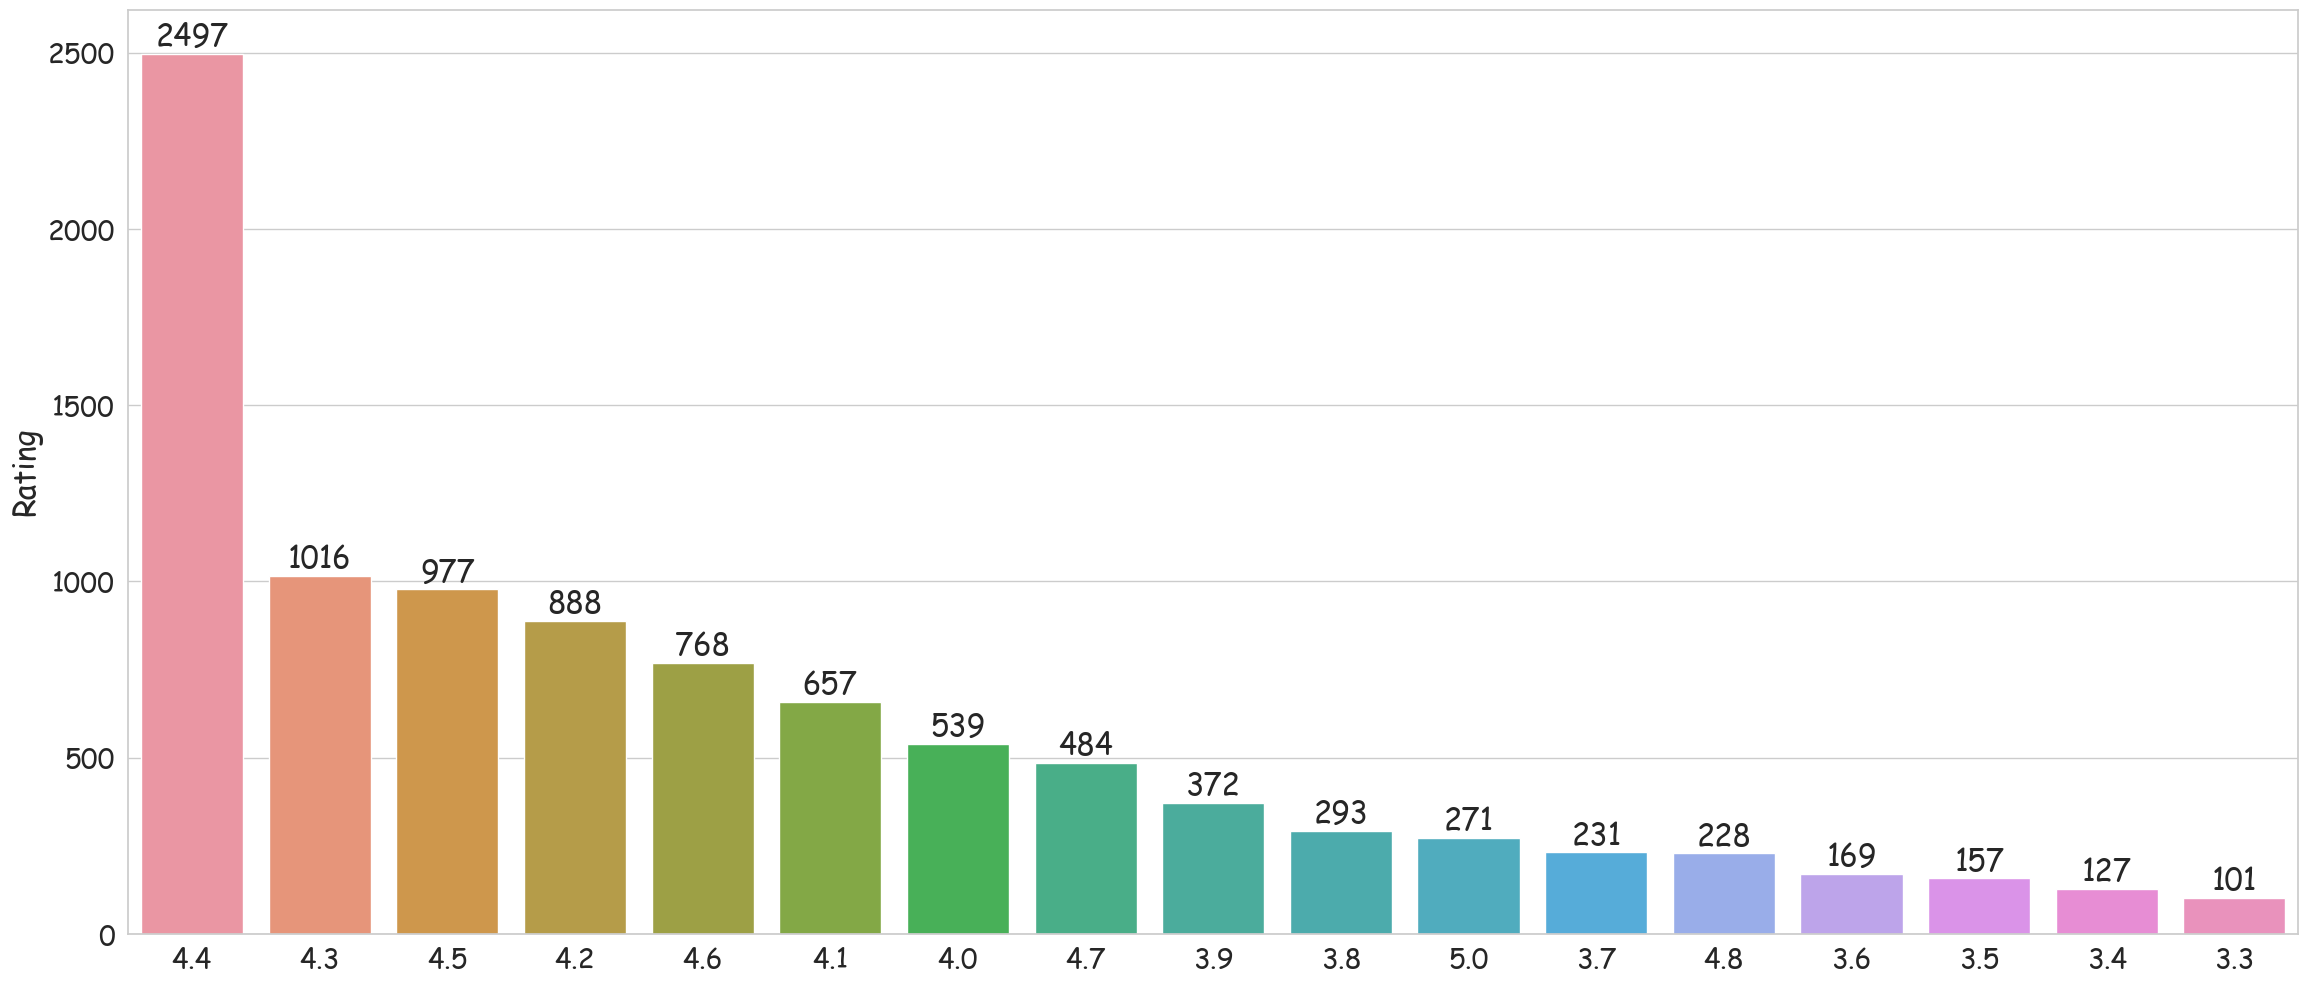

In [295]:
plt.figure(figsize=(28,12),dpi=100)
a=sns.barplot(y=rating,x=rating.index,order=rating.index)

for i in a.containers:
    a.bar_label(i)
plt.show()

In [297]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,2498500,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,115992,25.0,2498500,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Cateogry vs avg review`

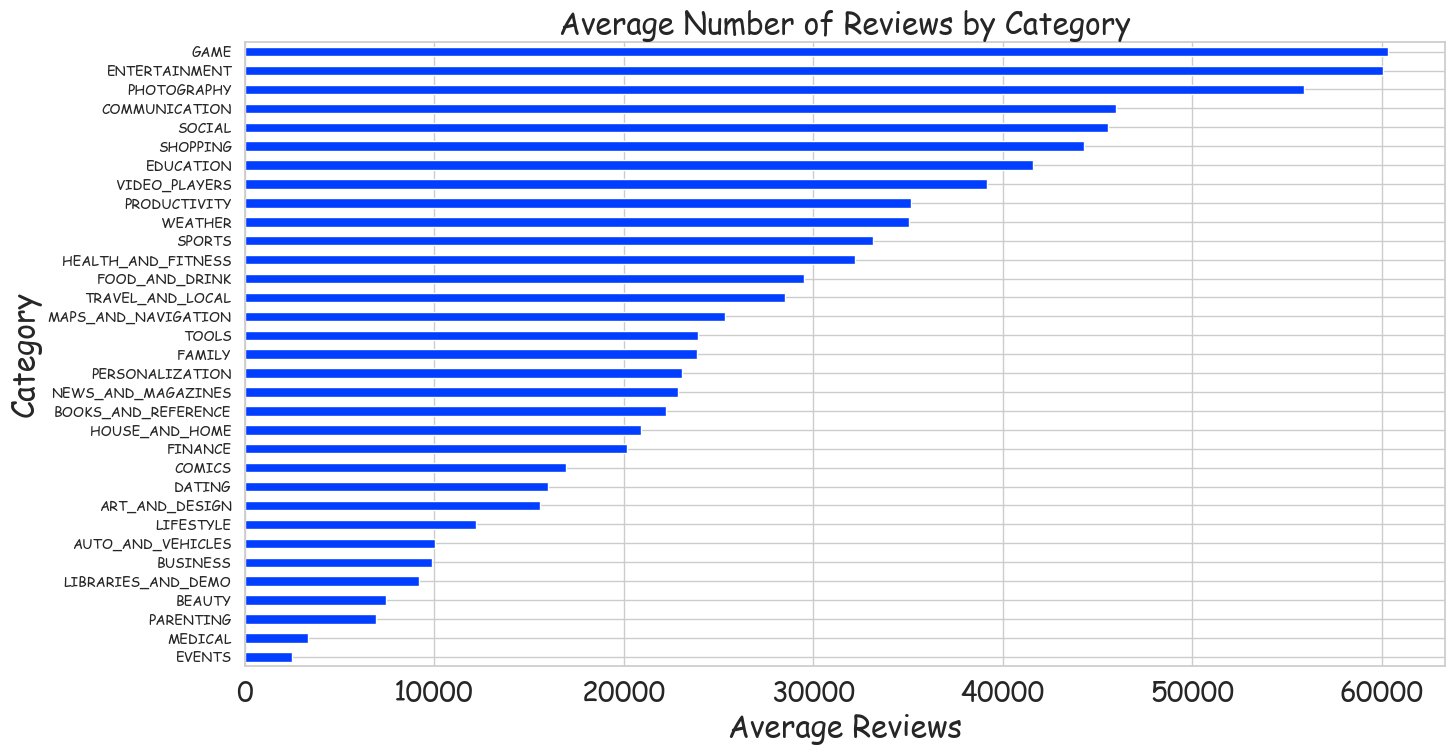

In [134]:

plt.figure(figsize=(15, 8))
category_reviews = df.groupby('Category')['Reviews'].mean().sort_values()
category_reviews.plot(kind='barh')

plt.title('Average Number of Reviews by Category')
plt.xlabel('Average Reviews')
plt.ylabel('Category')
plt.yticks(fontsize=10)  # Adjust the font size as needed
plt.tight_layout()

# Rotate y-axis labels if necessary
plt.yticks(rotation=0, ha='right')

plt.show()


In [155]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

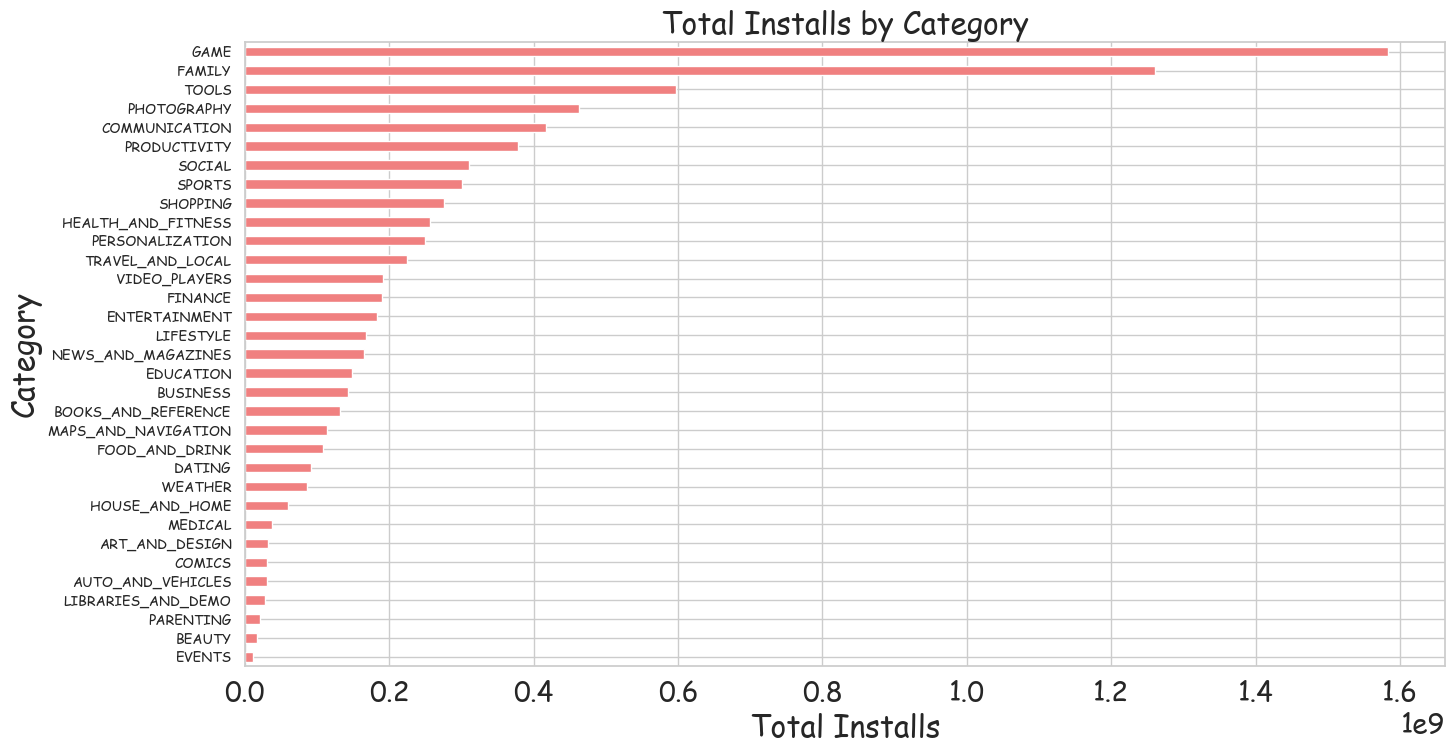

In [152]:

total_installs = df.groupby('Category')['Installs'].sum().sort_values()

plt.figure(figsize=(15, 8))
total_installs.plot(kind='barh', color='lightcoral')
plt.title('Total Installs by Category')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [301]:
df.drop('Category',axis=1,inplace=True)

In [303]:
# df.head()

# Genres

In [311]:
geners=df.Genres.value_counts()[df.Genres.value_counts()>50]
geners

Tools                      842
Entertainment              588
Education                  527
Business                   427
Medical                    408
Productivity               407
Personalization            388
Lifestyle                  372
Communication              366
Sports                     364
Finance                    360
Action                     356
Photography                322
Health & Fitness           306
Social                     280
News & Magazines           264
Travel & Local             236
Books & Reference          230
Shopping                   224
Arcade                     218
Simulation                 199
Dating                     196
Casual                     191
Video Players & Editors    173
Maps & Navigation          137
Puzzle                     136
Food & Drink               124
Role Playing               109
Strategy                   105
Racing                      98
Libraries & Demo            85
Auto & Vehicles             85
Weather 

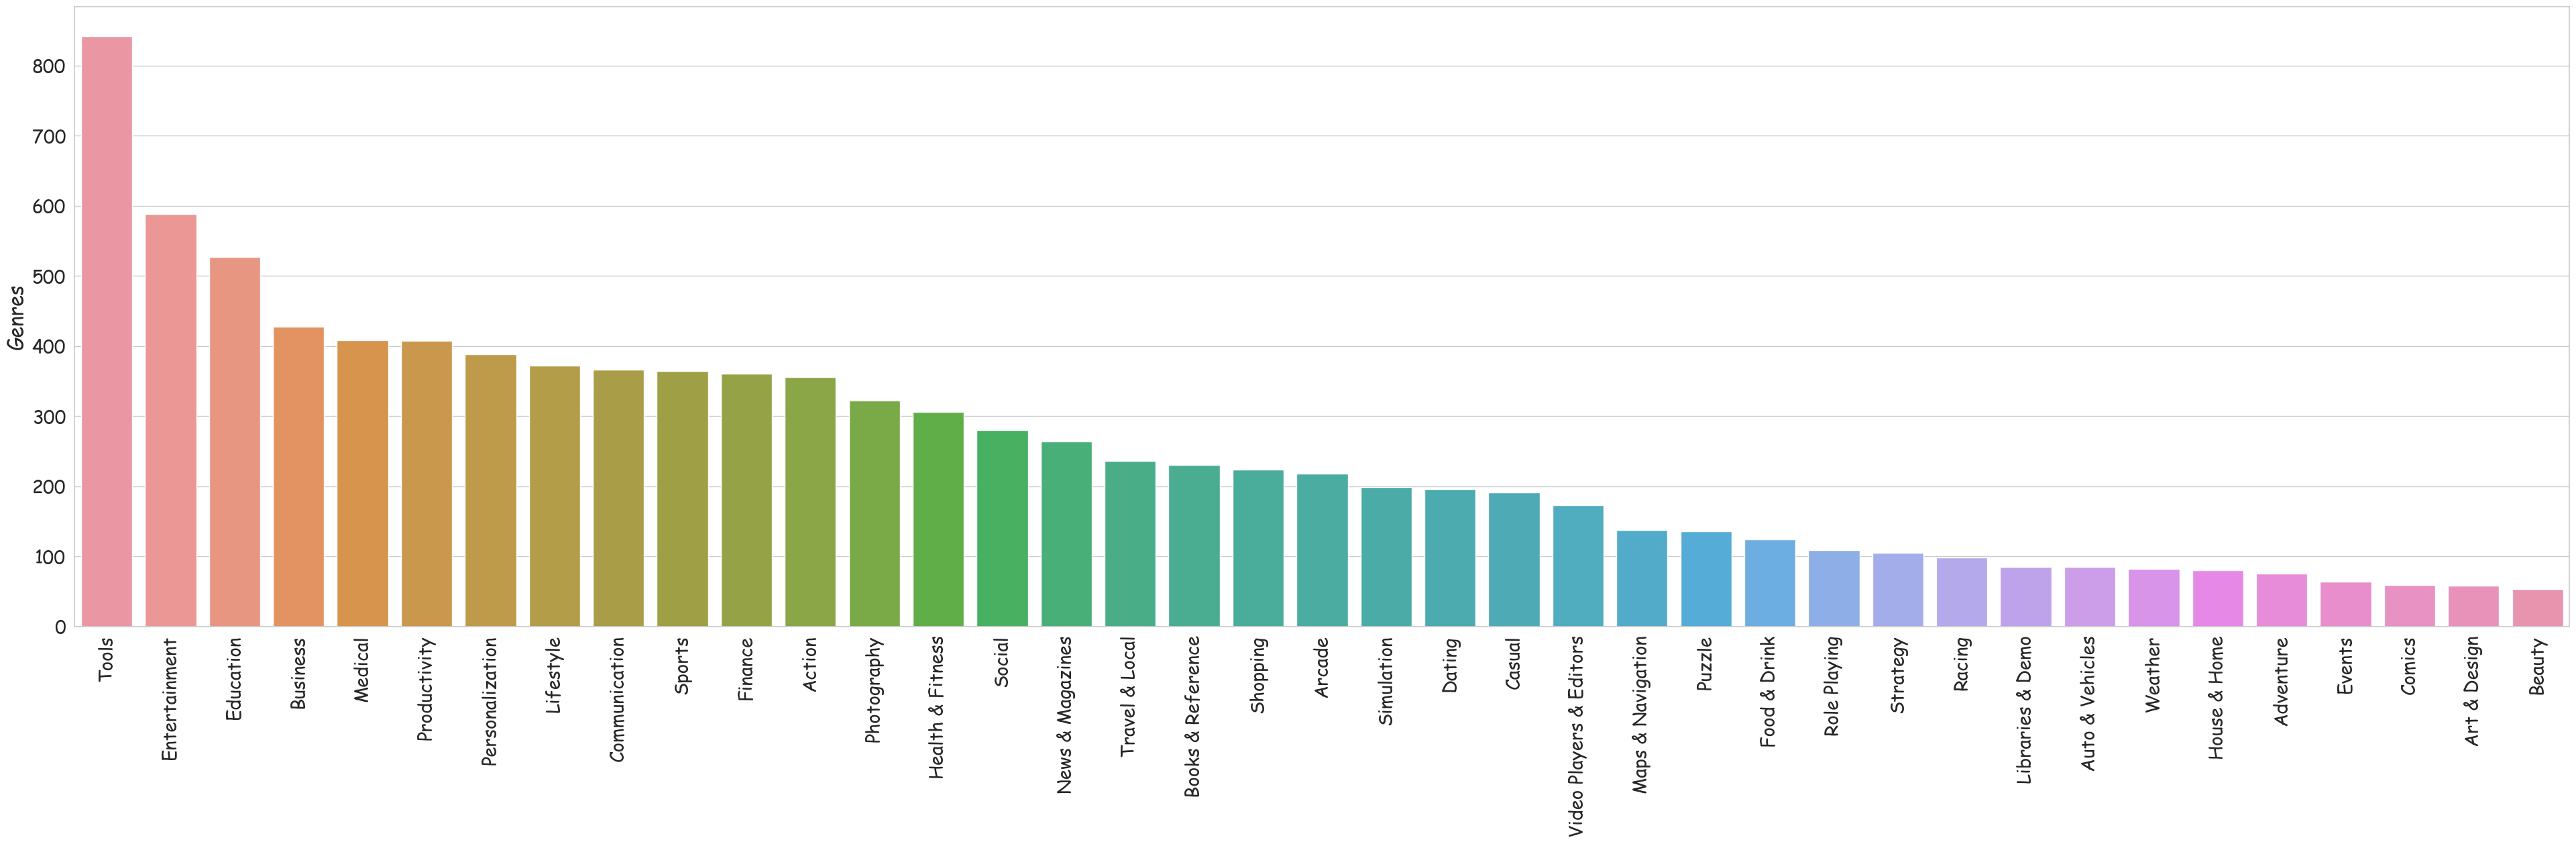

In [314]:
plt.figure(figsize=(48,12),dpi=100)
sns.barplot(y=geners,x=geners.index)
plt.xticks(rotation=90)

plt.show()

In [315]:
df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,2498500,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,115992,25.0,2498500,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# The apps with the highest rating

In [320]:
df[df.Rating==df.Rating.max()]['App']

296                    Hojiboy Tojiboyev Life Hacks
546                   American Girls Mobile Numbers
549                                    Awake Dating
567                           Spine- The dating app
570      Girls Live Talk - Free Text and Video Chat
                            ...                    
10238                             Mad Dash Fo' Cash
10259                         GKPB FP Online Church
10292                              Monster Ride Pro
10336                               Fr. Daoud Lamei
10353              Fr. Mike Schmitz Audio Teachings
Name: App, Length: 271, dtype: object

# Apps with the size between 40 and 50 mbs

In [328]:
for i in df[(df.Size<50)&(df.Size>40)]['App']:
    print(i)

Azpen eReader
QuickBooks Accounting: Invoicing & Expenses
Crew - Free Messaging and Scheduling
Cisco Webex Teams
Email TypeApp - Mail App
Mingle2 - Free Online Dating & Singles Chat Rooms
Gay Sugar Daddy Dating & Hookup – Sudy Gay
Heart mill
BiggerCity: Chat for gay bears, chubs & chasers
JustDating
Dinosaurs Coloring Pages
Cars Coloring Pages
Ready4 SAT (Prep4 SAT)
Ready4 GMAT (Prep4 GMAT)
HelloTalk — Chat, Speak & Learn Foreign Languages
HelloTalk — Chat, Speak & Learn Foreign Languages
Fuzzy Numbers: Pre-K Number Foundation
Talking Ginger 2
FOX
Sticker Market: Emoji keyboard
Hamilton — The Official App
Meme Creator
Citibanamex Movil
Ecobank Mobile Banking
PayPal
People's Bank
WiseBanyan - Invest For Free
Experian - Free Credit Report
NetSpend Prepaid
PayPal
Netspend Skylight ONE
ACE Elite
Citi Mobile®
McDonald's
Refreshing app Free application that can use deal coupons
SONIC Drive-In
SUBWAY®
Dairy Queen
Couch to 10K Running Trainer
Relax Meditation: Sleep with Sleep Sounds
Yoga - Tr

# Apps that begin with A

In [337]:
df[df.App.str.contains(r'^A')]['App']

27                               Animated Photo Editor
31                                   Art Drawing Ideas
32                           Anime Manga Coloring Book
53                            American Muscle Car Race
72       Android Auto - Maps, Media, Messaging & Voice
                             ...                      
10036                                Art of F J Taylor
10075    Austria Wien FK - Fussball - Inoffizielle App
10132                        Alachua County Sheriff FL
10203                               Armed Cam Gun Pack
10206                      Alarm.fo – choose your info
Name: App, Length: 852, dtype: object

# Apps with more than 4 rating and are Free

In [339]:
df.groupby('Type').Rating.value_counts()

Type  Rating
Free  4.4       2274
      4.3        966
      4.5        909
      4.2        831
      4.6        692
                ... 
Paid  3.2          2
      1.7          1
      1.8          1
      2.0          1
      2.5          1
Name: Rating, Length: 71, dtype: int64

In [351]:
df[(df.Rating>4.5)&(df.Type=='Paid')]

,App,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
233,TurboScan: scan documents and receipts in PDF,4.7,11442,6.800000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
234,Tiny Scanner Pro: PDF Doc Scan,4.8,10295,39.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
741,Sago Mini Hat Maker,4.9,11,56.450000,1000,Paid,3.99,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up
742,Fuzzy Numbers: Pre-K Number Foundation,4.7,21,44.000000,1000,Paid,5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
743,Toca Life: City,4.7,31085,24.000000,500000,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10048,Kernel Manager for Franco Kernel ✨,4.8,12700,10.000000,100000,Paid,3.49,Everyone,Tools,"August 3, 2018",3.2.5,5.0 and up
10087,FL SW Fishing Regulations,4.6,60,24.000000,1000,Paid,1.99,Everyone,Sports,"March 7, 2014",1.03,2.2 and up
10196,Solitaire+,4.6,11235,21.516527,100000,Paid,2.99,Everyone,Card,"July 30, 2018",Varies with device,Varies with device
10207,FO Bixby,5.0,5,0.860000,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up


# Distribution

In [352]:
cols

['Reviews', 'Size', 'Installs']

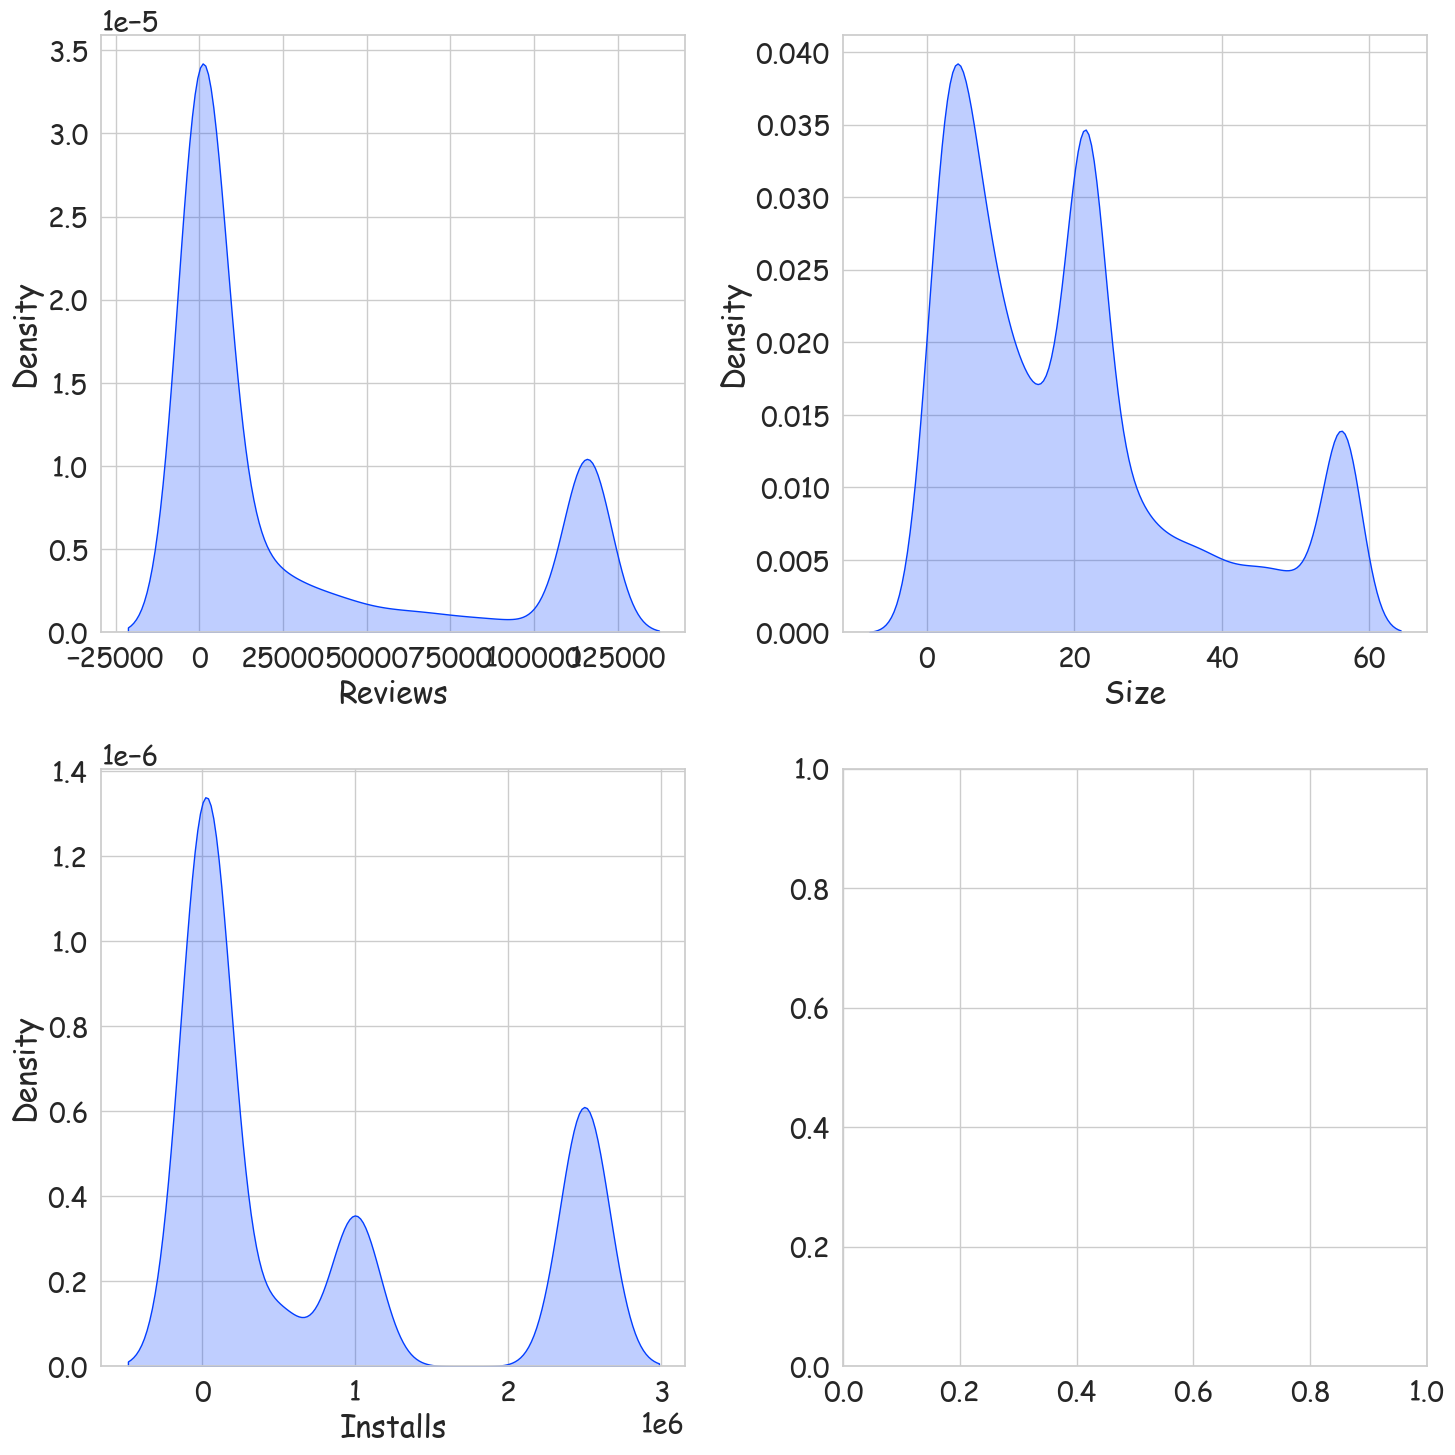

In [362]:
f,ax=plt.subplots(2,2,figsize=(15,15),dpi=100)
col_index=0

try:
    for i in range(2):
        for j in range(2):
            sns.kdeplot(df[cols[col_index]],fill=True,ax=ax[i,j])
            col_index+=1
except:
    pass
plt.tight_layout()
plt.show()